In [4]:
# % cd..
import env
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np

from scipy import signal
from scipy.signal import stft
from scipy.io import wavfile

import matplotlib.pyplot as plt

from env import *
from visualization import plot_spec

plt.style.use({'figure.facecolor':'white'})

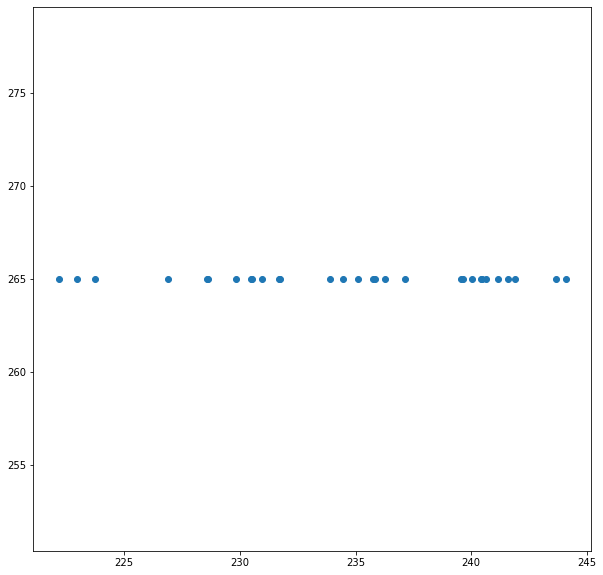

In [10]:
"""
In this code block, we visualize the spectrogram w.r.t. different dft size
and hop size
"""

from scipy.fft import dct
from data import read_audio
from data.transform import db_to_amp, log_stft
from data.metadata import vcc
from data import AudioData

from data.transform import cepstrum
from data import fundamental_freq
from data.fundamental_freq import FundamentalFreqEstimator
import env
def test_single_speaker(speaker_id=0, num_audio=30):
    """Test whether the embedding is consistent"""
    spec = []
    for i in range(num_audio):
        dat = AudioData(vcc.train_2016_appended(speaker_id, i))
        log_amp = log_stft(dat.amp)
        estimator = FundamentalFreqEstimator(log_amp)
        spec.append(estimator.get_speaker_spec())
    spec = np.array(spec)
    # plt.figure(figsize=(10,10))
    plt.scatter(spec[:, 0], spec[:, 1])


plt.figure(figsize=(10,10))
test_single_speaker(1)

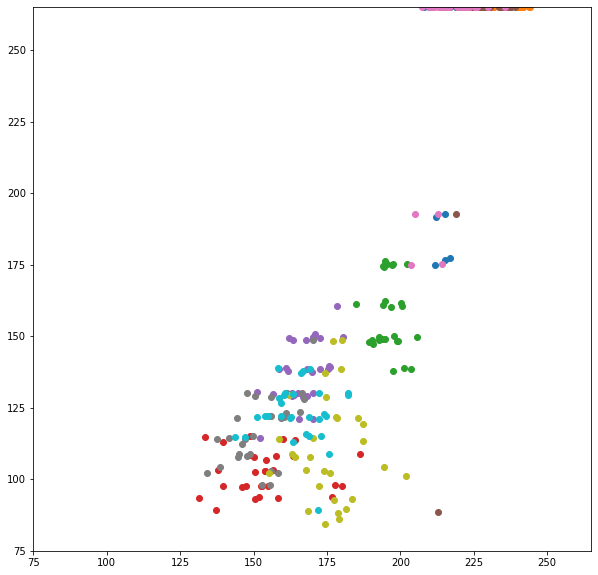

In [11]:
plt.figure(figsize=(10,10))
plt.xlim(75, 265)
plt.ylim(75,265)
for i in range(10):
    test_single_speaker(i)

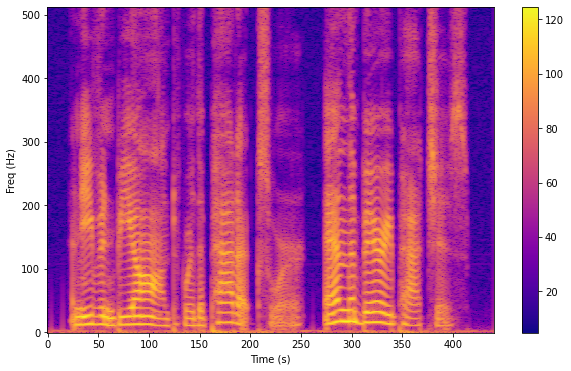

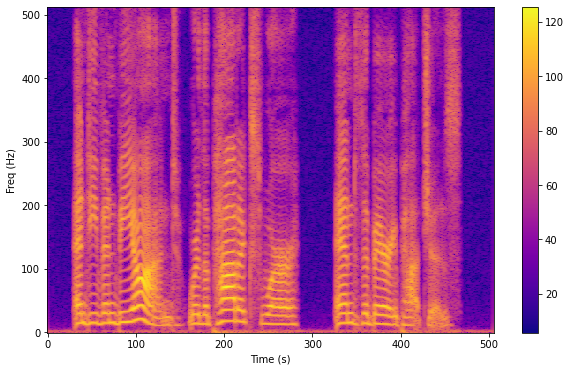

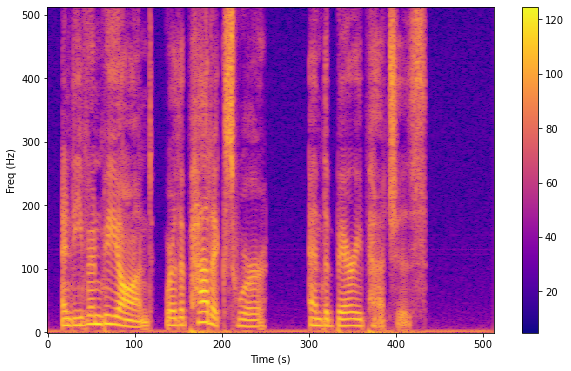

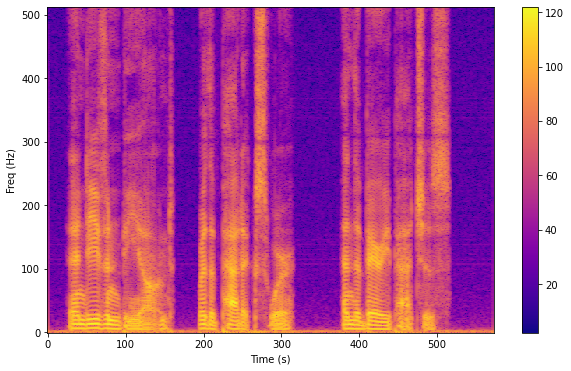

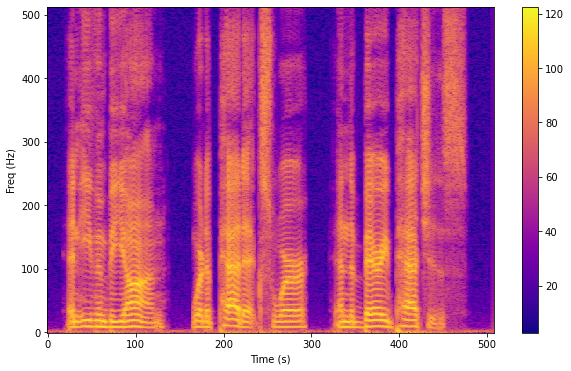

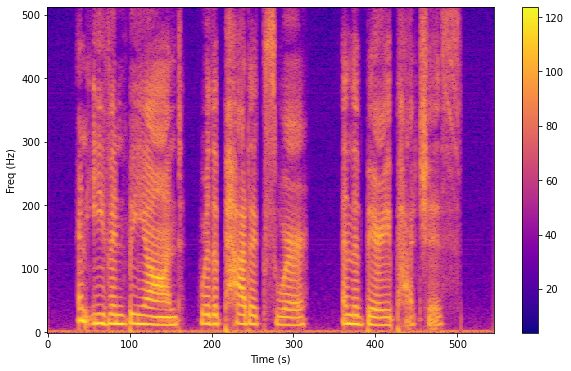

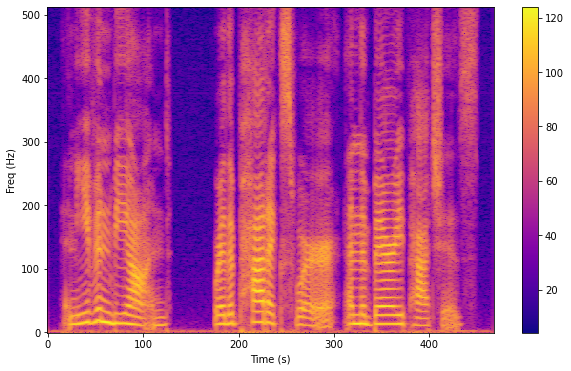

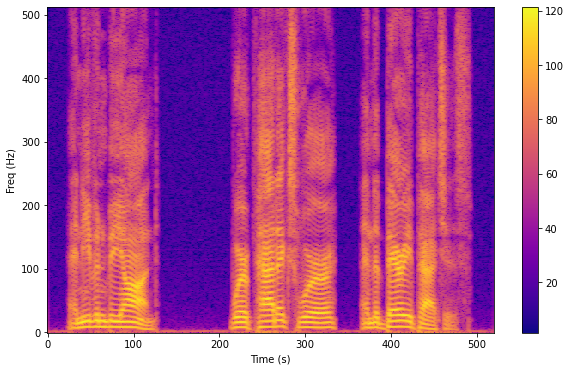

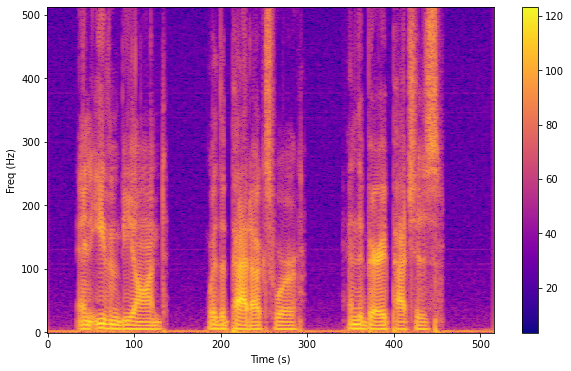

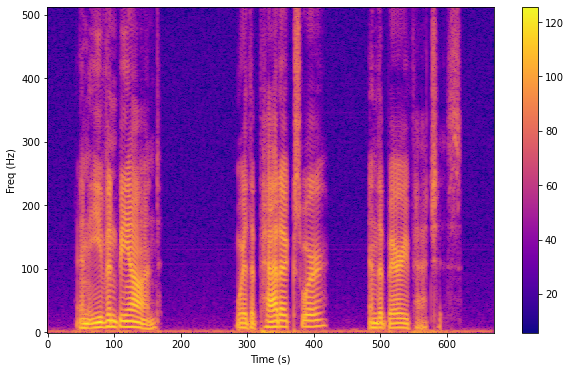

In [8]:
for speaker_id in range(10):
    dat = AudioData(vcc.train_2016_appended(speaker_id, 0))
    log_amp = log_stft(dat.amp)
    plot_spec(log_amp)